# Clase 11:	Algunas mejoras a los códigos para simular y optimizar portafolios 

[Juan Diego Sánchez Torres](https://www.researchgate.net/profile/Juan_Diego_Sanchez_Torres), 

*Profesor*, [MAF ITESO](http://maf.iteso.mx/web/general/detalle?group_id=5858156)

+ Departamento de Matemáticas y Física
+ dsanchez@iteso.mx
+ Tel. 3669-34-34 Ext. 3069
+ Oficina: Cubículo 4, Edificio J, 2do piso

# 1. Motivación

En primer lugar, para poder bajar precios y información sobre opciones de Yahoo, es necesario cargar algunos paquetes de Python. En este caso, el paquete principal será Pandas. También, se usarán el Scipy y el Numpy para las matemáticas necesarias y, el Matplotlib y el Seaborn para hacer gráficos de las series de datos. Finalmente, se usará el paquete **cvxopt** para optimización convexa, para instalar ingrese en terminal la instrucción: *conda install -c anaconda cvxopt*

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import scipy.stats as stats
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.covariance as skcov
import cvxopt as opt
from cvxopt import blas, solvers
solvers.options['show_progress'] = False
%matplotlib inline
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)
#Funciones para portafolios
import portfolio_func

# 2. Uso de Pandas para descargar datos de precios de cierre

Una vez cargados los paquetes, es necesario definir los tickers de las acciones que se usarán, la fuente de descarga (Yahoo en este caso, pero también se puede desde Google) y las fechas de interés. Con esto, la función *DataReader* del paquete *pandas_datareader* bajará los precios solicitados.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte. El siguiente comando instala el paquete en Anaconda:
*conda install -c conda-forge pandas-datareader *

In [2]:
assets = ['IYF','IHI','REM','IYR','IVV','VOX','EDV','VHT','VFH']
closes = portfolio_func.get_historical_closes(assets, '2016-01-01', '2017-09-22')

# 3. Formulación del riesgo de un portafolio y simulación Montecarlo

In [3]:
daily_returns=portfolio_func.calc_daily_returns(closes)

In [4]:
yb=(0.0124/252)
daily_returns['BOND']=yb*np.ones(daily_returns.index.size)
daily_returns_b=daily_returns

In [5]:
r =0.0131/252
results_frame = portfolio_func.sim_mont_portfolio(daily_returns_b,100000,r)

C:\Users\ibys\Anaconda3.2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\ibys\Anaconda3.2\lib\site-packages\statsmodels\robust\scale.py:164: RuntimeWarning: invalid value encountered in true_divide
  subset = np.less_equal(np.fabs((a - mu)/scale), self.c)
C:\Users\ibys\Anaconda3.2\lib\site-packages\statsmodels\robust\scale.py:164: RuntimeWarning: invalid value encountered in less_equal
  subset = np.less_equal(np.fabs((a - mu)/scale), self.c)
C:\Users\ibys\Anaconda3.2\lib\site-packages\statsmodels\robust\scale.py:164: RuntimeWarning: divide by zero encountered in true_divide
  subset = np.less_equal(np.fabs((a - mu)/scale), self.c)


In [6]:
#Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe'].idxmax()]
#Menor SD
min_vol_port = results_frame.iloc[results_frame['SD'].idxmin()]


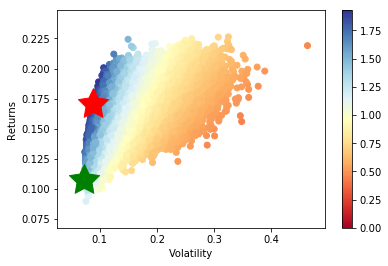

In [7]:
plt.scatter(results_frame.SD,results_frame.Returns,c=results_frame.Sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000);
#Menor SD
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000);

In [8]:
pd.DataFrame(max_sharpe_port)

,2054
Returns,1.703e-01
SD,8.831e-02
Sharpe,1.927e+00
EDV,2.071e-01
IHI,1.977e-01
...,...
REM,7.131e-04
VFH,1.703e-01
VHT,7.106e-02
VOX,1.140e-02


In [9]:
pd.DataFrame(min_vol_port)

,98756
Returns,0.107
SD,0.072
Sharpe,1.489
EDV,0.180
IHI,0.055
...,...
REM,0.002
VFH,0.019
VHT,0.117
VOX,0.086


# 4. Optimización de portafolios

In [24]:
daily_returns=portfolio_func.calc_daily_returns(closes)

In [25]:
N=5000
results_frame_optim = portfolio_func.optimal_portfolio(daily_returns,N,r)

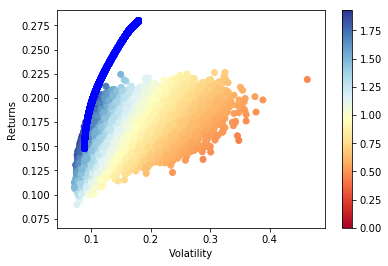

In [39]:
#Montecarlo
plt.scatter(results_frame.SD,results_frame.Returns,c=results_frame.Sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Markowitz
plt.plot(results_frame_optim.SD, results_frame_optim.Returns, 'b-o');

In [27]:
#Sharpe Ratio
max_sharpe_port_optim = results_frame_optim.iloc[results_frame_optim['Sharpe'].idxmax()]
#Menor SD
min_vol_port_optim = results_frame_optim.iloc[results_frame_optim['SD'].idxmin()]

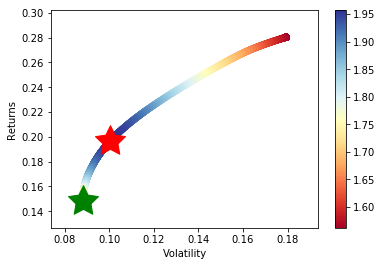

In [28]:
#Markowitz
plt.scatter(results_frame_optim.SD,results_frame_optim.Returns,c=results_frame_optim.Sharpe,cmap='RdYlBu');
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Sharpe Ratio
plt.scatter(max_sharpe_port_optim[1],max_sharpe_port_optim[0],marker=(5,1,0),color='r',s=1000);
#SD
plt.scatter(min_vol_port_optim[1],min_vol_port_optim[0],marker=(5,1,0),color='g',s=1000);

In [29]:
pd.DataFrame(max_sharpe_port_optim)

,2291
Returns,1.967e-01
SD,1.005e-01
Sharpe,1.957e+00
EDV,2.341e-01
IHI,3.279e-01
...,...
IYR,7.129e-03
REM,6.872e-05
VFH,1.702e-01
VHT,1.371e-06


In [30]:
pd.DataFrame(min_vol_port_optim)

,4999
Returns,1.484e-01
SD,8.813e-02
Sharpe,1.684e+00
EDV,3.127e-01
IHI,7.014e-02
...,...
IYR,6.285e-02
REM,1.277e-08
VFH,1.233e-01
VHT,1.086e-01


## Inclusión de un bono

In [31]:
results_frame_optim_b = portfolio_func.optimal_portfolio_b(daily_returns,10000,r,(0.0131/252))

In [32]:
#Sharpe Ratio
max_sharpe_port_optim_b = results_frame_optim_b.iloc[results_frame_optim_b['Sharpe'].idxmax()]
#Menor SD
min_vol_port_optim_b = results_frame_optim_b.iloc[results_frame_optim_b['SD'].idxmin()]

In [52]:
results_frame_optim_b['Returns']

0       0.280
1       0.280
2       0.280
3       0.280
4       0.280
        ...  
9995    0.013
9996    0.013
9997    0.013
9998    0.013
9999    0.013
Name: Returns, Length: 10000, dtype: float64

In [33]:

pd.DataFrame(max_sharpe_port_optim_b)

,9999
Returns,1.344e-02
SD,1.860e-04
Sharpe,7.197e+01
EDV,3.981e-04
IHI,5.847e-04
...,...
REM,1.032e-05
VFH,2.773e-04
VHT,4.516e-05
VOX,6.410e-05


In [34]:
pd.DataFrame(min_vol_port_optim_b)


,9999
Returns,1.344e-02
SD,1.860e-04
Sharpe,7.197e+01
EDV,3.981e-04
IHI,5.847e-04
...,...
REM,1.032e-05
VFH,2.773e-04
VHT,4.516e-05
VOX,6.410e-05


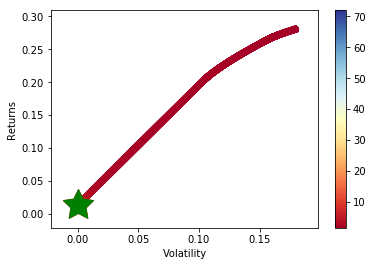

In [41]:
#Markowitz
plt.scatter(results_frame_optim_b.SD,results_frame_optim_b.Returns,c=results_frame_optim_b.Sharpe,cmap='RdYlBu');
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Sharpe Ratio
plt.scatter(max_sharpe_port_optim_b[1],max_sharpe_port_optim_b[0],marker=(5,1,0),color='r',s=1000);
#SD
plt.scatter(min_vol_port_optim_b[1],min_vol_port_optim_b[0],marker=(5,1,0),color='g',s=1000);


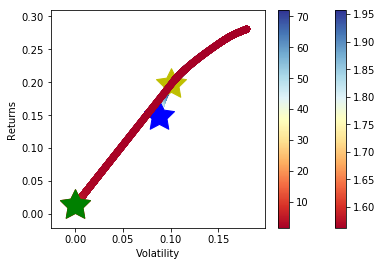

In [45]:
#Portafolio sin bonos
#Markowitz
plt.scatter(results_frame_optim.SD,results_frame_optim.Returns,c=results_frame_optim.Sharpe,cmap='RdYlBu');
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Sharpe Ratio
plt.scatter(max_sharpe_port_optim[1],max_sharpe_port_optim[0],marker=(5,1,0),color='y',s=1000);
#SD
plt.scatter(min_vol_port_optim[1],min_vol_port_optim[0],marker=(5,1,0),color='b',s=1000);

#Portafolio con bonos 
#Markowitz
plt.scatter(results_frame_optim_b.SD,results_frame_optim_b.Returns,c=results_frame_optim_b.Sharpe,cmap='RdYlBu');
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Sharpe Ratio
plt.scatter(max_sharpe_port_optim_b[1],max_sharpe_port_optim_b[0],marker=(5,1,0),color='r',s=1000);
#SD
plt.scatter(min_vol_port_optim_b[1],min_vol_port_optim_b[0],marker=(5,1,0),color='g',s=1000);
